# Polinomial regression

### Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

boston_dataset = load_boston()

In [22]:
def gradient_descent_vectorized(x, y, theta = [[0], [0]], alpha = 0.01, num_iters = 400):
    J_history = np.zeros((num_iters))
    for k in range(num_iters):
        h = x.dot(theta)
        theta = theta - (alpha/m)*(x.T.dot(h-y))
        J_history[k] = compute_cost_vectorized(x, y, theta)
    return theta, J_history

In [23]:
def compute_cost_vectorized(x, y, theta):
    h = x.dot(theta)
    J = (h-y).T.dot(h-y)
    return J/(2*m)

In [24]:
def normal_equation(x, y):
    return np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y)

In [25]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [26]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [28]:
boston['MEDV'] = boston_dataset.target
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [29]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Cerchiamo le correlazioni

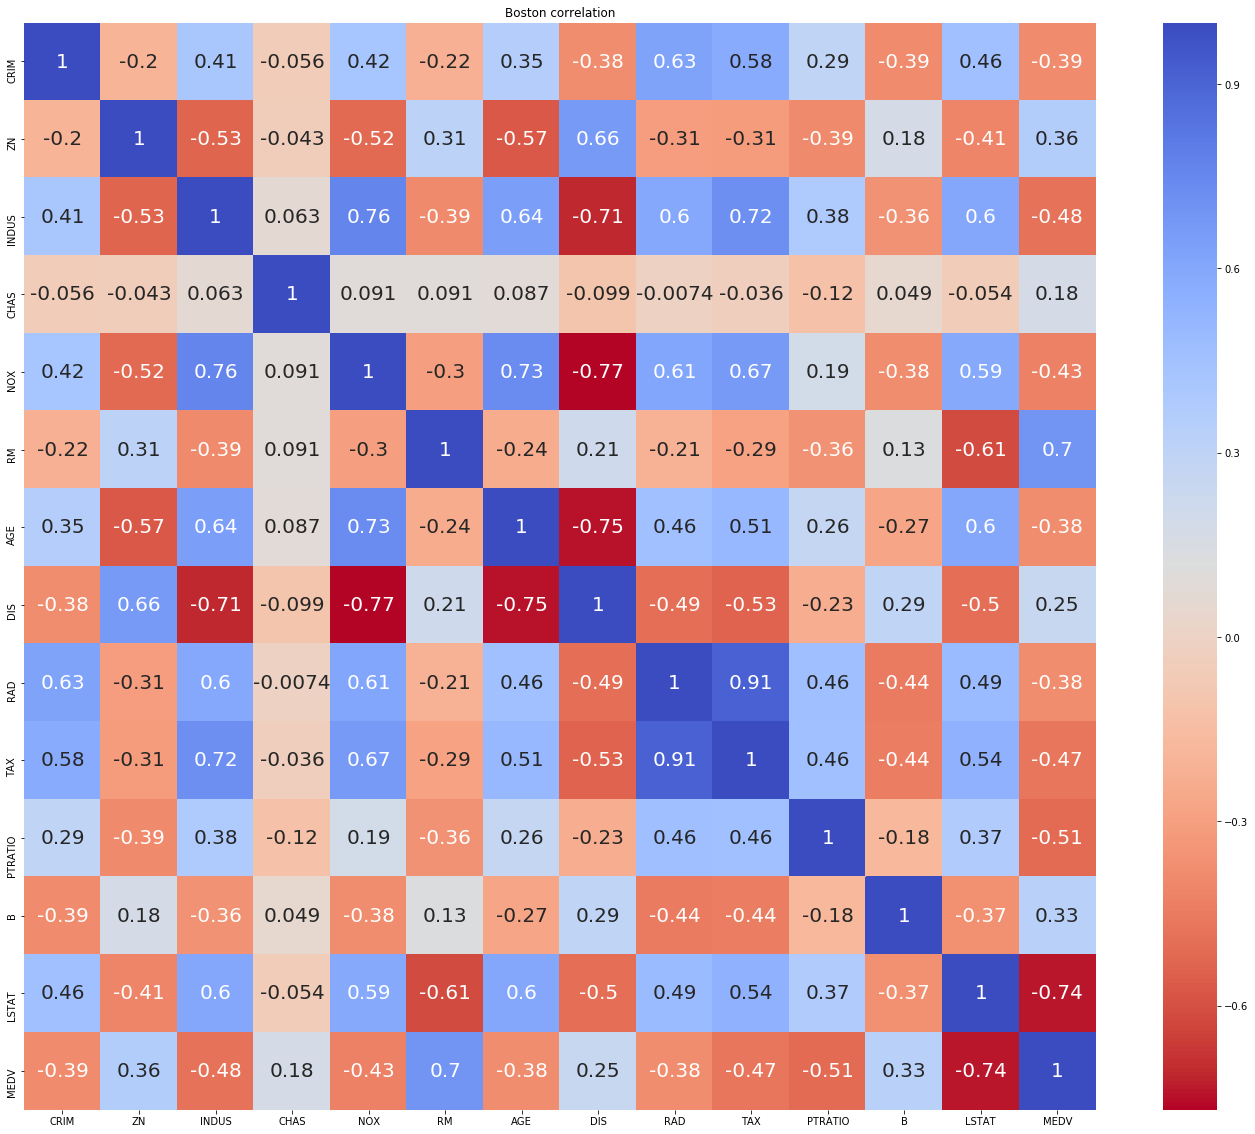

In [30]:
f, (ax1) = plt.subplots(1, 1, figsize = (24, 20))
corr = boston.corr(method = "pearson")
sns.heatmap(corr, cmap = 'coolwarm_r', annot = True, annot_kws = {'size': 20}, ax = ax1)
ax1.set_title('Boston correlation')
plt.show()

Qui possiamo stabilire le varie correlazioni presenti nel dataset, sia positivamente che negativamente

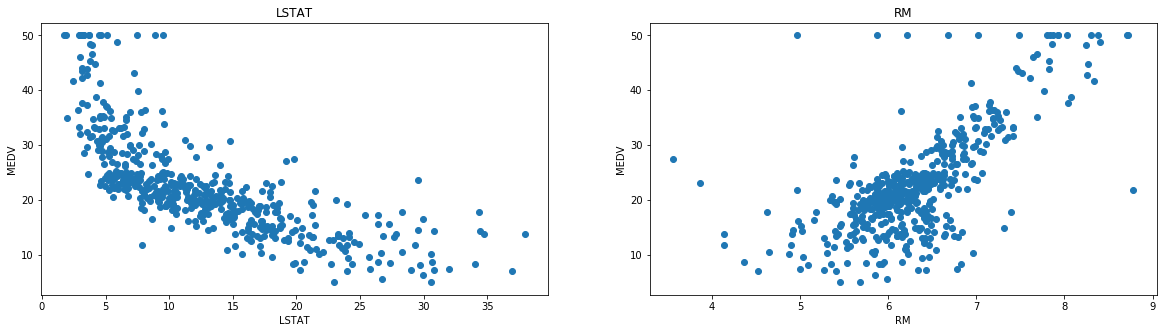

In [31]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Non sempre la linear regression è la soluzione migliore per analizzare i dati solo perchè magari si adatta bene.

Capita anche che l'algoritmo è fittato bene sul dataset ma quando passiamo dati per la predizione sbaglia di molto.

### Linear regression with one variable

In [32]:
x = pd.DataFrame(np.c_[boston['RM']], columns = ['RM'])
x.head()
y = boston['MEDV'].values.reshape((y.shape[0], 1))

x = np.concatenate([np.ones((x.shape[0], 1)), x], axis = 1)

m = x.shape[0]
n = x.shape[1]

print('Training examples: ', m)
print('Features : ', n)


Training examples:  506
Features :  2


In [33]:
theta = np.ones((2,1))
num_iters = 50000
alpha = 0.01
theta, J_history = gradient_descent_vectorized(x, y, theta, alpha, num_iters)

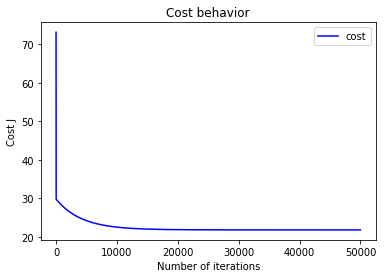

In [34]:
plt.plot([i for i in range(num_iters)], J_history, 'b', label = 'cost')
plt.xlabel('Number of iterations') # Set the x−axis label
plt.ylabel('Cost J') # Set the y−axis label 
plt.title('Cost behavior')
plt.legend()
plt.show()

Le funzioni nelle reti neurali hanno molti minimi locali, quindi troppe iterazioni rischiano di avere risultati errati ciò porta a molto rumore.

Si usa fare una esecuzione esplorativa, dopo di che si riesegue troncando le iterazioni a prima del rialzo della curva in modo da ottenere risultati consoni

In [35]:
theta_ne = normal_equation(x, y)
print(theta)
cost = compute_cost_vectorized(x, y, theta_ne)

[[-34.58233438]
 [  9.08822991]]


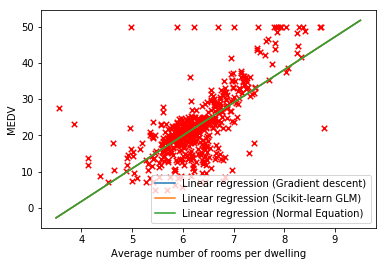

In [36]:
xx = np.arange(3.5,10)
yy = theta[0] + theta[1] * xx

# Plot gradient descent
plt.scatter(x[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(x[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_ + regr.coef_ * xx, label='Linear regression (Scikit-learn GLM)')

# Compare with Normal Equations
plt.plot(xx, theta_ne[0] + theta_ne[1] * xx, label='Linear regression (Normal Equation)')

#plt.xlim(-2,10)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('MEDV')
plt.legend(loc=4);

root mean squared error 
$RMSE = \sqrt{\frac{\sum^{m}_{i=1}(y^{^}_{i}-y_{i})}{m}}$

In [42]:
y_pred = np.zeros((x.shape[0], 1))
y_pred = x.dot(theta)

result = np.sqrt(mean_squared_error(y, y_pred))

In [43]:
result

6.603078661136538

# Polinomial regression

facciamo una funziona per il quadrato ed il cubo di ogni valore della feature
più dati non risolvono l'overfitting
con l'underfitting basta inserire feature polinomiali

In [64]:
dataframe = pd.DataFrame(x[:, 1], columns = ['RM'])

def polynomial_features(x, degree):
    for i in range(1, degree):
        label = 'RM_%d'%(i+1)
        x[label] = x['RM']**(i+1)
    return x
new_data = polynomial_features(dataframe, 1)

In [65]:
new_data

RM
0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
5    6.430
6    6.012
7    6.172
8    5.631
9    6.004
10   6.377
11   6.009
12   5.889
13   5.949
14   6.096
15   5.834
16   5.935
17   5.990
18   5.456
19   5.727
20   5.570
21   5.965
22   6.142
23   5.813
24   5.924
25   5.599
26   5.813
27   6.047
28   6.495
29   6.674
..     ...
476  6.484
477  5.304
478  6.185
479  6.229
480  6.242
481  6.750
482  7.061
483  5.762
484  5.871
485  6.312
486  6.114
487  5.905
488  5.454
489  5.414
490  5.093
491  5.983
492  5.983
493  5.707
494  5.926
495  5.670
496  5.390
497  5.794
498  6.019
499  5.569
500  6.027
501  6.593
502  6.120
503  6.976
504  6.794
505  6.030

[506 rows x 1 columns]

# Esercizio per casa
## facciamo la stessa cosa per lstat al posto di RM